In [1]:
# Import dependencies
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Define path directories
path_dir = "C:/Users/Hp/GITHUB/Face-Recognition"
train_path = "C:/Users/Hp/GITHUB/Face-Recognition/Train"
test_path = "C:/Users/Hp/GITHUB/Face-Recognition/Test"

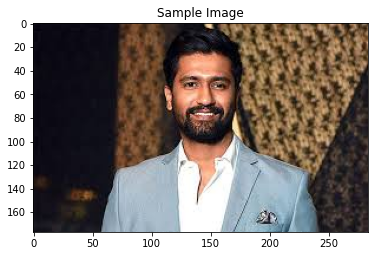

In [3]:
# Read a sample image from file
img = cv2.imread("C:/Users/Hp/GITHUB/Face-Recognition/Train/3/16.jpeg")

# Convert image from BGR to RGB format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Display image
plt.imshow(img)
plt.title("Sample Image")
plt.show()

In [4]:
# Define the path of HaarCascade pretrained model
detector_path = "C:/Users/Hp/GITHUB/Face-Recognition/haarcascade_frontalface_default.xml"

In [5]:
# Function to detect face in frame
def detect_face(img):
    
    # Convert input image from BGR format to grayscale
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Load pretrained HaarCascade model for detection
    detector = cv2.CascadeClassifier(detector_path)
    
    # Use model to detect face(s) in frame
    faces = detector.detectMultiScale(image, 1.2, 5)
    
    # If no faces are detected, return negative
    if(len(faces) == 0):
        return -1, -1
    
    # If face is detected, store coordinates of bounding box of detected face
    (x, y, w, h) = faces[0]
    
    # Return the face and bounding box coordinates
    return image[y:y+w, x:x+h], faces[0]

In [6]:
# Function for preprocessing training data
def preprocess_training_data(train_path):
    
    # Lists to store detected faces and their corresponding labels
    detected_faces = []
    face_labels = []
    
    # Get the list of all folders within training directory i.e., all exisiting labels (people) 
    train_img_folders = os.listdir(train_path)
    
    # Iterate through each folder in training directory
    for dir_name in train_img_folders:
        
        # Set folder name as label for image
        label = int(dir_name)
        
        # Set path of each folder
        train_img_path = train_path + '/' + dir_name
        
        # Get list of all training images in each folder
        train_img_names = os.listdir(train_img_path)
        
        # Iterate through each image
        for img in train_img_names:
            
            # Get path of each image
            img_path = train_img_path + '/' + img
            
            # Read image 
            image = cv2.imread(img_path)
            
            # Detect face
            face, rect = detect_face(image)
            
            # Resize all images to same size
            face = cv2.resize(face, (120,120), interpolation = cv2.INTER_AREA)
            
            # Store resized face and bounding box in the allotted lists
            detected_faces.append(face)
            face_labels.append(label)
        
    # Return the lists of faces and labels
    return detected_faces, face_labels

In [7]:
# Preprocess training data and collect results
detected_faces, face_labels = preprocess_training_data(train_path)


In [8]:
# Print number of faces detected and labels
print("Total faces : ", len(detected_faces))
print("Total labels : ", len(face_labels))

Total faces :  120
Total labels :  120


In [12]:
# Initialize face recognition model
# model = cv2.face.EigenFaceRecognizer_create()
# model = cv2.face.FisherFaceRecognizer_create()
model = cv2.face.LBPHFaceRecognizer_create()

In [13]:
# Train model with preprocessed training data
model.train(detected_faces, np.array(face_labels))

In [14]:
# Function to draw bounding box around face in test image
def draw_box(test_img, rect, label_text, x, y):
    
    # Coordinates of the rectangle
    x, y, w, h = rect
    
    # Draw rectangle around face in the test image
    cv2.rectangle(test_img, (x,y), (x+w, y+h), (0, 255, 0), 3)
    
    # Put predicted result (Label) as text above detected face
    cv2.putText(test_img, label_text, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (0, 255, 0), 3)

In [15]:
# List of all Names corresponding to labels
tags = ['Camila', 'Zendaya', 'Deepika', 'Vicky', 'Robert', 'Taylor']

In [16]:
# Function to predict label of test image
def predict(test_img):
    
    # Detect face and bounding box in test image
    detected_face, rect = detect_face(test_img)
    
    # Resize face
    detected_face = cv2.resize(detected_face, (120,120), interpolation = cv2.INTER_AREA)
    
    # Predict label
    label = model.predict(detected_face)
    label_text = str(label) #tags[label[0]]
    
    # Display predicted label on test image
    draw_box(test_img, rect, label_text, rect[0], rect[1]-10)
    
    # Return labeled image and label
    return test_img, label_text

In [23]:
# Give test_image
test_img = cv2.imread("C:/Users/Hp/GITHUB/Face-Recognition/Test/3/21.jpeg")

In [24]:
# Predict for test image
pred_img, pred_label = predict(test_img)

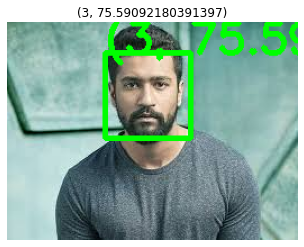

In [25]:
# Display result
plt.imshow(cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB))
plt.title(pred_label)
plt.axis("off")
plt.show()